# Project: GAPminder World

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  Gapminder identifies systematic misconceptions about important global trends and proportions and uses reliable data to develop easy to understand teaching materials to rid people of their misconceptions.
Gapminder is an independent Swedish foundation with no political, religious, or economic affiliations.


> #### Questions to be answered:

> what is the correlation between Population and GDP per capita?

> What is the correlation between life expectancy, GDP and Population?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling


### General Properties


### Gathering Data
#### create Dataframes and read csv files

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pop = pd.read_csv('population_total.csv')
gdp_cap = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
life_exp = pd.read_csv('life_expectancy_years.csv')

### Assess Data

In [3]:
# check samples of data
pop.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000


DF contains info of countries around the world with population from 1800 to 2100

In [4]:
# check samples of data
gdp_cap.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300


DF contains info of countries around the world with population from 1800 to 2100

In [5]:
# check samples of data
life_exp.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3


DF contains info of countries around the world with population from 1800 to 2100


### Data Cleaning

#### Quality and Tidines Issues:
    * Data have blank values need to be removed
    * Data have duplicates need to be handled
    * need to add each contient/ region for each countries to help in the visualization
    * need to gather different indicators in one master data frame to help in analysis
    * data have a lot of years and we only need to compare few years

#### Define

#### drop the null cells

#### Code

In [6]:
def blank(df):
    if pd.isna(df).sum().sum():
        return df.dropna(axis=0)
    return df

In [7]:
life_exp = blank(life_exp)
pop = blank(pop)
gdp_cap = blank(gdp_cap)

#### Test

In [8]:
pd.isna(life_exp).sum().sum()

0

In [9]:
pd.isna(pop).sum().sum()

0

In [10]:
pd.isna(gdp_cap).sum().sum()

0

#### Define

##### merge all dataframes to a master DF

#### Code

In [11]:
# Merge all the dataframes to a master DF
master_df = [pop, life_exp, gdp_cap]

In [12]:
gapminder = reduce(lambda left, right: pd.merge(left, right, on='country'), master_df)
gapminder.head()

,country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310
4,Antigua and Barbuda,37000,37000,37000,37000,37000,37000,37000,37000,37000,...,28800,29400,30000,30600,31200,31800,32500,33100,33800,34500


Dataframes added in 1 master data frame but it have repeated years for each indicator need to be handled

#### Test

In [13]:
pd.isna(gapminder).sum().sum()

0

#### Define

##### adding countries regions to the data frame
slice 2 years data from the dataframes

#### Code

adding countries df

In [14]:
countries = pd.read_csv('countries.csv')
countries = countries.loc[:, ['name', 'region']]
countries.head()

,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


add regions of the countries to the main data frame

In [15]:
gapminder = pd.merge(gapminder, countries, how='inner', left_on='country', right_on='name').drop('name', axis=1)
gapminder.head()

,country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2032,2033,2034,2035,2036,2037,2038,2039,2040,region
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,2600,2660,2710,2770,2820,2880,2940,3000,3060,Asia
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,19800,20200,20600,21000,21500,21900,22300,22800,23300,Europe
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,14600,14900,15200,15500,15800,16100,16500,16800,17100,Africa
3,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,6230,6350,6480,6610,6750,6880,7020,7170,7310,Africa
4,Antigua and Barbuda,37000,37000,37000,37000,37000,37000,37000,37000,37000,...,29400,30000,30600,31200,31800,32500,33100,33800,34500,Americas


In [16]:
# slice from the dataframe 2 years : 2020 and 1920 to compare between them
df_1920 = gapminder.filter(regex='1920|country|region')
df_2020 = gapminder.filter(regex='2020|country|region')
df_1920.columns = df_2020.columns = ['country', 'population', 'life_expectancy', 'gdp_per_capita', 'region']

#### Test

In [17]:
df_1920.head()

,country,population,life_expectancy,gdp_per_capita,region
0,Afghanistan,10600000,30.6,1490,Asia
1,Albania,949000,35.4,1530,Europe
2,Algeria,5750000,29.6,2360,Africa
3,Angola,2880000,30.4,1250,Africa
4,Antigua and Barbuda,29800,33.9,1680,Americas


In [18]:
df_2020.head()

,country,population,life_expectancy,gdp_per_capita,region
0,Afghanistan,38900000,64.4,1800,Asia
1,Albania,2880000,78.6,13200,Europe
2,Algeria,43900000,78.3,14000,Africa
3,Angola,32900000,65.4,5440,Africa
4,Antigua and Barbuda,97900,77.4,25000,Americas


 change the population column by dividing by 1 million to make it easier in data analysis

In [19]:
df_1920['population'] = df_1920["population"] / 1000000
df_2020['population'] = df_2020['population'] / 1000000

<ipython-input-19-a4a081d47b65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1920['population'] = df_1920["population"] / 1000000
<ipython-input-19-a4a081d47b65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['population'] = df_2020['population'] / 1000000


In [20]:
df_1920.head()

,country,population,life_expectancy,gdp_per_capita,region
0,Afghanistan,10.6000,30.6,1490,Asia
1,Albania,0.9490,35.4,1530,Europe
2,Algeria,5.7500,29.6,2360,Africa
3,Angola,2.8800,30.4,1250,Africa
4,Antigua and Barbuda,0.0298,33.9,1680,Americas


In [21]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          159 non-null    object 
 1   population       159 non-null    float64
 2   life_expectancy  159 non-null    float64
 3   gdp_per_capita   159 non-null    int64  
 4   region           159 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.5+ KB


In [22]:
df_2020.head()

,country,population,life_expectancy,gdp_per_capita,region
0,Afghanistan,38.9000,64.4,1800,Asia
1,Albania,2.8800,78.6,13200,Europe
2,Algeria,43.9000,78.3,14000,Africa
3,Angola,32.9000,65.4,5440,Africa
4,Antigua and Barbuda,0.0979,77.4,25000,Americas


In [23]:
df_1920.head()

,country,population,life_expectancy,gdp_per_capita,region
0,Afghanistan,10.6000,30.6,1490,Asia
1,Albania,0.9490,35.4,1530,Europe
2,Algeria,5.7500,29.6,2360,Africa
3,Angola,2.8800,30.4,1250,Africa
4,Antigua and Barbuda,0.0298,33.9,1680,Americas


In [24]:
# save the 2 df to csv files for future use
df_1920.to_csv('1920.csv')
df_2020.to_csv('2020.csv')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### what is the correlation between Population and GDP per capita?


/Users/heshamkhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


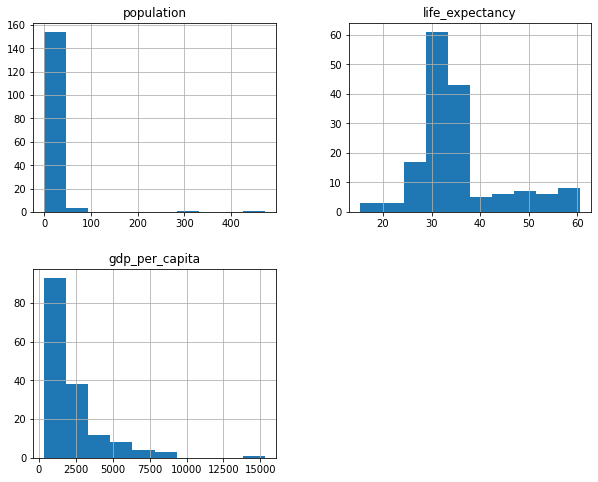

In [25]:
#exploring 1920 data by visualization
df_1920.hist(figsize=(10, 8))
plt.show()

Showing distrbutions of the data for each indicator in 1920

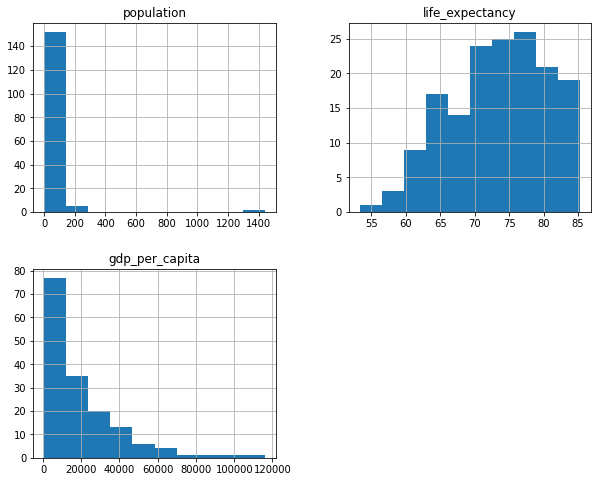

In [26]:
#exploring 2020 data by visualization
df_2020.hist(figsize=(10, 8))
plt.show()

Showing distrbutions of the data for each indicator in 2020

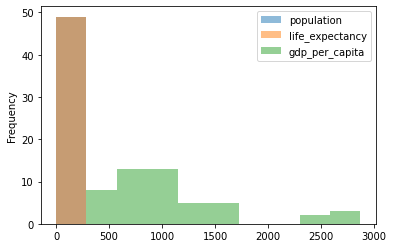

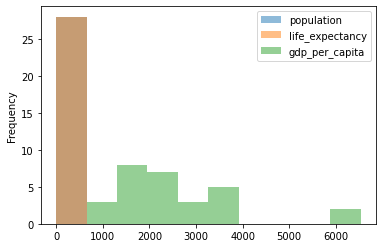

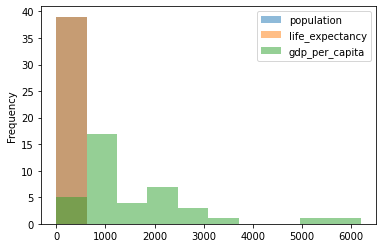

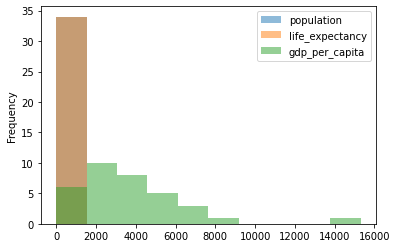

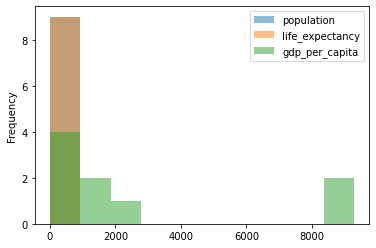

In [27]:
# ploting 3 indicators with grouping by the region
df_1920.groupby('region').plot(kind='hist', alpha= 0.5)
plt.show()

Showing distrbutions of the data for each indicator and comparing them with each others for year 1920

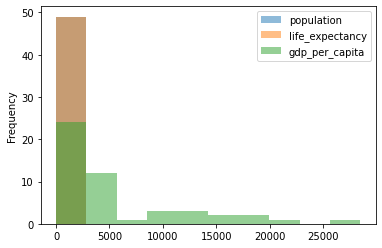

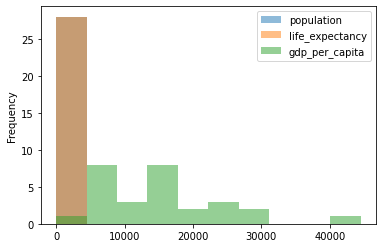

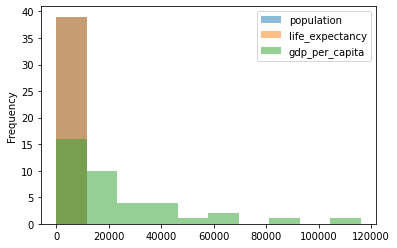

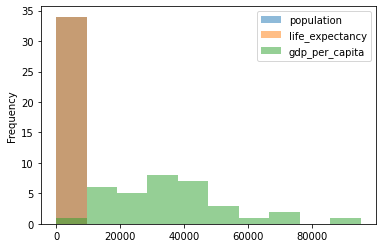

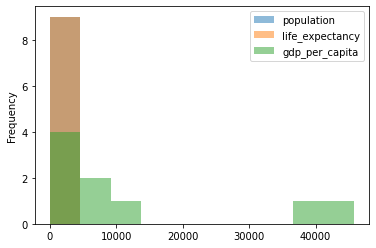

In [28]:
df_2020.groupby('region').plot(kind='hist', alpha= 0.5)
plt.show()

Showing distrbutions of the data for each indicator and comparing them with each others for year

In [29]:
# create function to make histogram for different data between 1920 and 2020
def hist_df(name, plot_title):
    plt.hist(df_1920[name], bins=20, alpha=0.5, label='1920')
    plt.hist(df_2020[name], bins=20, alpha=0.5, label='2020')
    plt.title(plot_title)
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

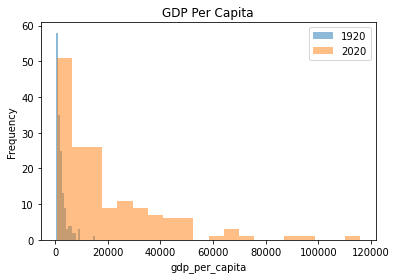

In [30]:
hist_df('gdp_per_capita', 'GDP Per Capita')

comparing the distrbution for data of 1920 and 2020 as per the GDP per Capita

it showing that its right skewed for both 2020 and 1920

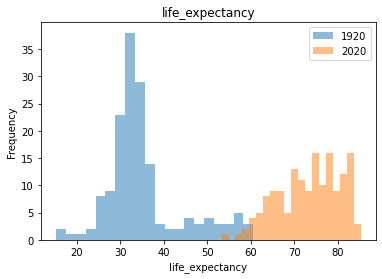

In [31]:
hist_df('life_expectancy', 'life_expectancy')

comparing the distrbution for data of 1920 and 2020 as per the  life expectancy

showing that its normal distrbution for the 1920 and it changed to be left skewed for 2020 which reflect the difference happen in life expectancy throughout the years

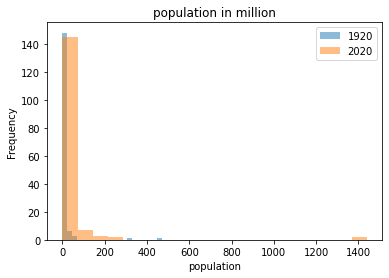

In [32]:
hist_df('population', 'population in million')

comparing the distrbution for data of 1920 and 2020 as per the population

it showing that both years have right skewed distrbution with some outliers like 1400 mil in 2020

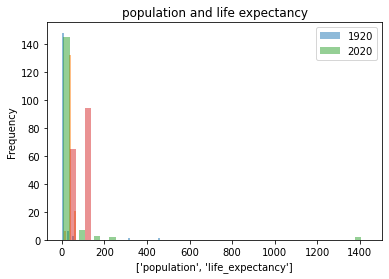

In [33]:
hist_df(['population', 'life_expectancy'], 'population and life expectancy')

comparing the distrbution for data of 1920 and 2020 as per both population and life expectancy

to show relationship between them

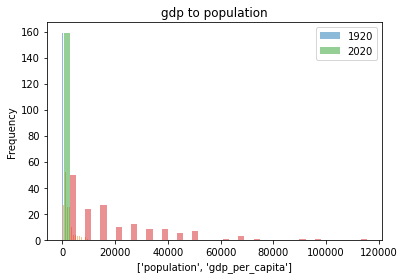

In [34]:
hist_df(['population', 'gdp_per_capita'], 'gdp to population')

comparing the distrbution for data of 1920 and 2020 as per both population and GDP per capita
which reflects correlation for gdp and population needs more analysis to get more info

### relationship between GDP and population

In [35]:
df_1920.describe()

,population,life_expectancy,gdp_per_capita
count,159.000000,159.000000,159.000000
mean,10.046044,35.181761,2191.176101
std,45.445723,8.771869,2061.637930
min,0.018800,15.200000,356.000000
25%,0.401500,30.600000,900.000000
50%,1.680000,33.100000,1540.000000
75%,5.180000,35.950000,2700.000000
max,472.000000,60.600000,15300.000000


In [36]:
index = df_1920[(df_1920['population'] >= 300)|(df_1920['population'] < 0)].index
df_1920.drop(index, inplace=True)
df_1920['population'].describe()

/Users/heshamkhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


count    157.000000
mean       5.148541
std        9.783441
min        0.018800
25%        0.394000
50%        1.670000
75%        5.000000
max       62.400000
Name: population, dtype: float64

In [37]:
index = df_2020[(df_2020['population'] >= 1200)|(df_2020['population'] < 0)].index
df_2020.drop(index, inplace=True)
df_2020['population'].describe()

/Users/heshamkhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


count    157.000000
mean      24.544466
std       43.258748
min        0.097900
25%        2.540000
50%        9.450000
75%       27.700000
max      274.000000
Name: population, dtype: float64

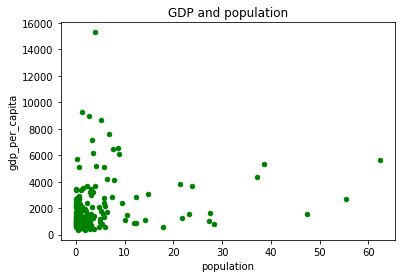

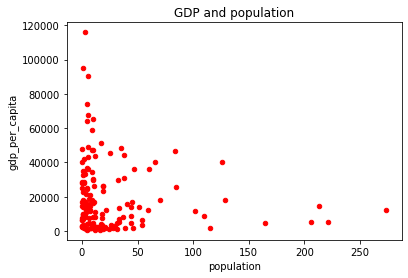

In [38]:
# showing scatter plots to confirm the relation between GDP and population and how affect the individuals gdp
df_1920.plot(kind='scatter',x='population',y='gdp_per_capita',color='green', title='GDP and population')
df_2020.plot(kind='scatter',x='population',y='gdp_per_capita',color='red', title='GDP and population')
plt.show()

showing scatter plots to confirm the relation between GDP and population and how affect the individuals gdp

## what is the correlation between Population and GDP per capita?
Answer 1 :
as showing in the scatter plot the gdp and pop changed significantly from 1920 to 2020
that showing the relationship between the population and gdp as the more the population increasing the more decreasing happing in the gdp as the income per person become lower and lower

### What is the correclation between life expectancy, GDP and Population?

In [39]:
# describe info about the 2 df that help in analysis
print(df_1920.describe())
print(df_2020.describe())

       population  life_expectancy  gdp_per_capita
count  157.000000       157.000000      157.000000
mean     5.148541        35.267516     2208.662420
std      9.783441         8.785340     2068.905262
min      0.018800        15.200000      356.000000
25%      0.394000        30.600000      905.000000
50%      1.670000        33.100000     1550.000000
75%      5.000000        36.000000     2730.000000
max     62.400000        60.600000    15300.000000
       population  life_expectancy  gdp_per_capita
count  157.000000       157.000000      157.000000
mean    24.544466        73.361146    18838.802548
std     43.258748         7.060514    19950.004668
min      0.097900        53.300000      628.000000
25%      2.540000        68.200000     3950.000000
50%      9.450000        74.500000    12500.000000
75%     27.700000        78.900000    28100.000000
max    274.000000        85.300000   116000.000000


by using the info above 
it showing the average population increased triple from 1920 to 2020 and the average of life expectancy

increased almost double but in the same time the gdp per person is increased also during the same time

##### plotting histogram for the 3 indicators to confirm on there distrbutions for 1920

/Users/heshamkhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


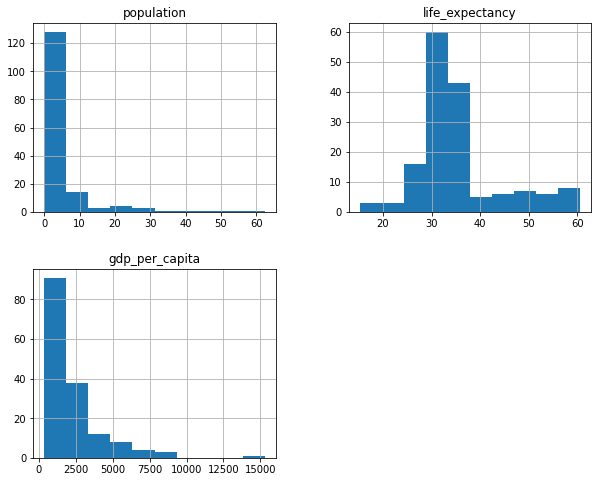

In [40]:
df_1920.hist(figsize=(10, 8))
plt.show()

##### plotting histogram for the 3 indicators to confirm on there distrbutions for 2020

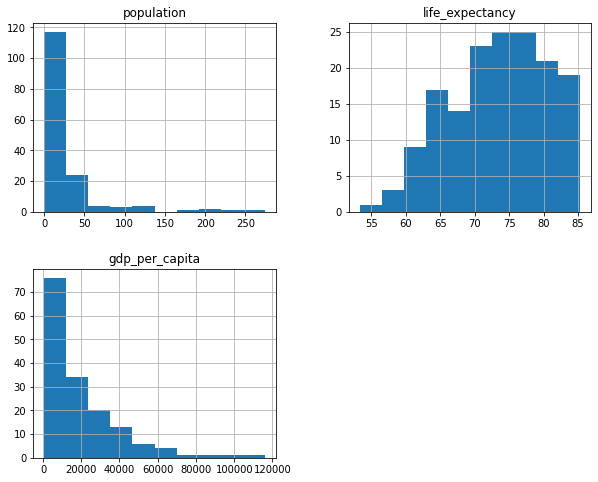

In [41]:
df_2020.hist(figsize=(10, 8))
plt.show()


##### __Answer 2__: 
* as showing on the above histograms the distrubition of the life expectency became more left skewed from 1920 to 2020
* and for gdp per capita its changed slightly and the distrubition more flattered
* for the population the skewed is changed more to right skewed
* what we can get from it that the more the gdp is increased the more the life_expectancy is increased
* and the more the population is increased that slightly impacting gdp per capita 

below visualization confirmed it



#### Creating the DF for visualization
reflecting changes and averages from 1920 to 2020

In [42]:
# regions analytics
pop_region_1920 = df_1920.groupby('region')['population'].mean()
pop_region_2020 = df_2020.groupby('region')['population'].mean()

In [43]:
# changes in populations by contintents 
population_change = pop_region_2020 - pop_region_1920
population_change

region
Africa      20.839537
Americas    19.798925
Asia        33.485386
Europe       5.787250
Oceania      3.769689
Name: population, dtype: float64

In [44]:
life_region_1920 = df_1920.groupby('region')['life_expectancy'].mean()
life_region_2020 = df_2020.groupby('region')['life_expectancy'].mean()

In [45]:
life_change = life_region_2020 - life_region_1920
life_change

region
Africa      33.836735
Americas    41.432143
Asia        45.159459
Europe      34.364706
Oceania     35.922222
Name: life_expectancy, dtype: float64

In [46]:
gdp_region_1920 = df_1920.groupby('region')['gdp_per_capita'].mean()
gdp_region_2020 = df_2020.groupby('region')['gdp_per_capita'].mean()

In [47]:
gdp_change = gdp_region_2020 - gdp_region_1920
gdp_change

region
Africa       4628.061224
Americas    12834.285714
Asia        22088.216216
Europe      32836.647059
Oceania     10120.777778
Name: gdp_per_capita, dtype: float64

#### the next 3 plots will show the change in each of the indicators and the other 3 plots will reflect the average of each indicator changes

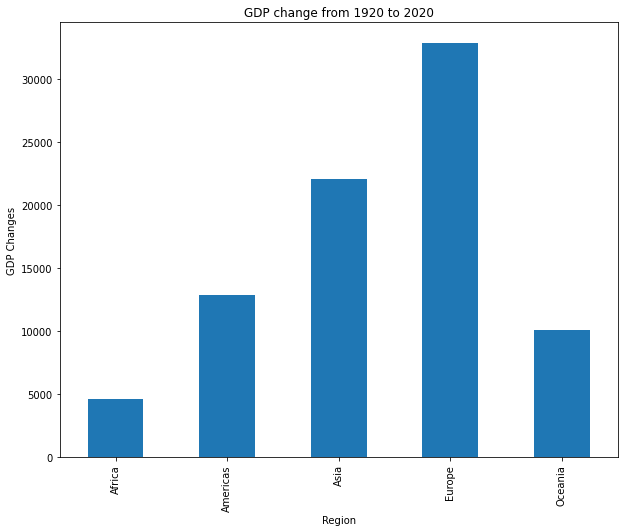

In [95]:
# GDP change graph
gdp_change.plot(kind='bar', figsize=(10,8))
plt.xlabel('Region')
plt.ylabel('GDP Changes')
plt.title('GDP change from 1920 to 2020')
plt.show()

changes happen in the GDP from 1920 to 2020

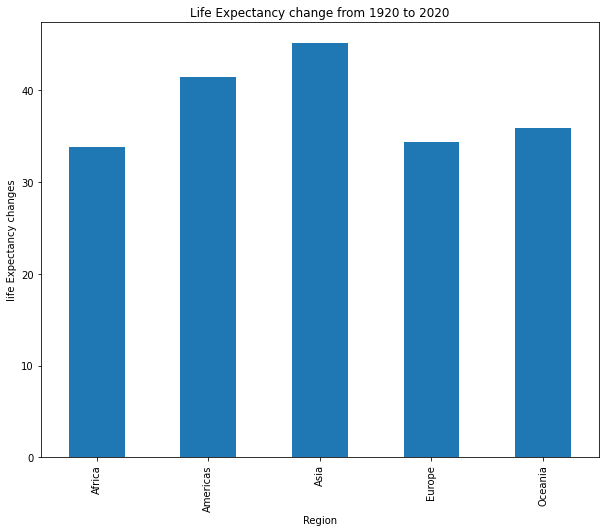

In [94]:
# life expectancy change graph
life_change.plot(kind='bar', figsize=(10,8))
plt.xlabel('Region')
plt.ylabel('life Expectancy changes')
plt.title('Life Expectancy change from 1920 to 2020')
plt.show()

Changes happen in life expectancy from 1920 to 2020

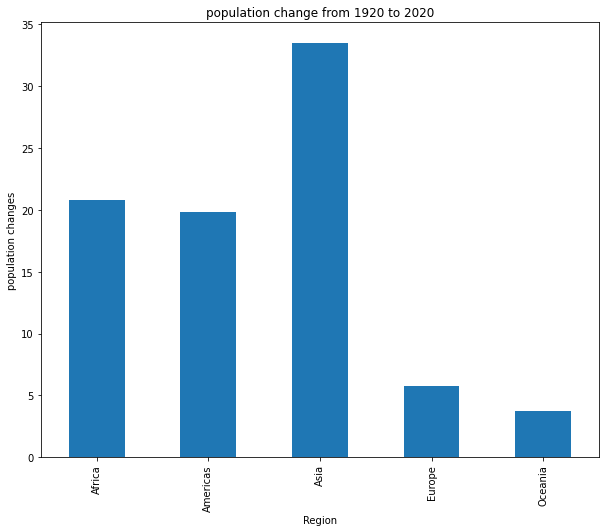

In [93]:
# population change graph
population_change.plot(kind='bar', figsize=(10,8))
plt.xlabel('Region')
plt.ylabel('population changes')
plt.title('population change from 1920 to 2020')
plt.show()

Changes happen in population from 1920 to 2020

#### in the next plots it will reflect the average of each indicator and how it changes throught the years for each region

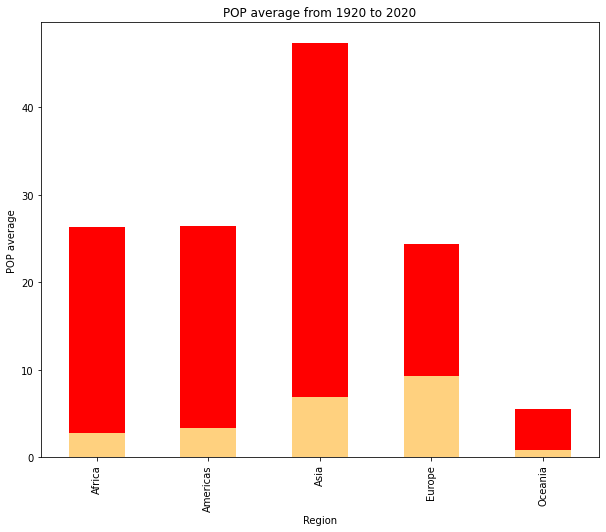

In [86]:
pop_region_1920.plot( kind='bar', alpha=0.5, color='orange', figsize=(10, 8))
pop_region_2020.plot( kind='bar', bottom=pop_region_1920, color='red', figsize=(10, 8))
plt.xlabel('Region')
plt.ylabel('POP average')
plt.title('POP average from 1920 to 2020')
plt.show()

significant changes in population average happens in almost each region specially Asia

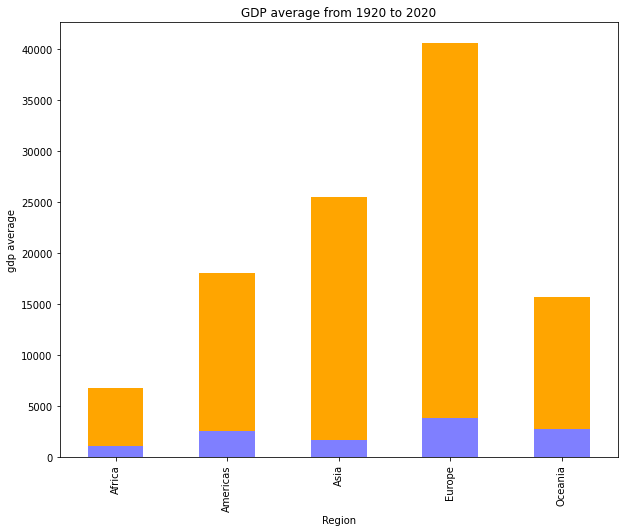

In [79]:
gdp_region_1920.plot( kind='bar', alpha=0.5, color='blue', figsize=(10, 8))
gdp_region_2020.plot( kind='bar', bottom=gdp_region_1920, color='orange', figsize=(10, 8))
plt.xlabel('Region')
plt.ylabel('gdp average')
plt.title('GDP average from 1920 to 2020')
plt.show()

significant changes in GDP average happens in almost each region specially Europe

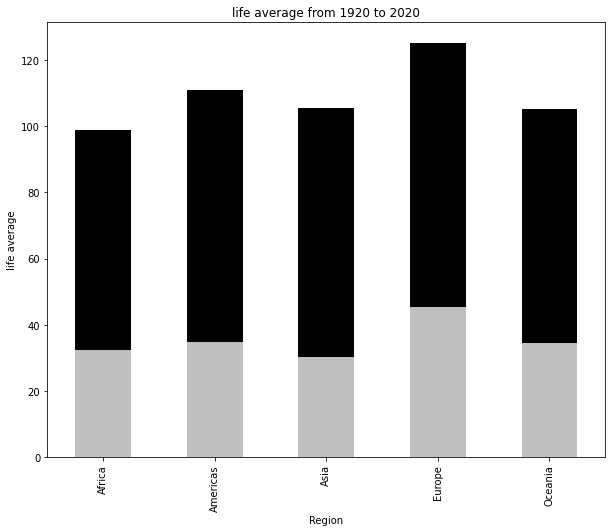

In [96]:
life_region_1920.plot( kind='bar', alpha=0.5, color='grey', figsize=(10, 8))
life_region_2020.plot( kind='bar', bottom=life_region_1920, color='black', figsize=(10, 8))
plt.xlabel('Region')
plt.ylabel('life average')
plt.title('life average from 1920 to 2020')
plt.show()

significant changes in life expectency average happens in almost each region specially Europe

### Limitation

* The whole dataset combined of many indicators like gdp and life expectancy so I had to decide which one to take in order to carry out this project.
* Next I have problem with that data have a lot of years which makes the analysis hard and need to pick just few years to analyze
* The data does not contain information about the region for each country so I had to get it from other sources.
* we didnt add all indicators that impacting these factors so the results may vary if more indicators added to it

<a id='conclusions'></a>
## Conclusions

The goal for project to analyze a dataset that got from gapminder which contains different indicators
I choosed 3 main indicators which are gdp per capita, population and life expectency
and I make some comparison between them and found some correlations between different indicators and how they impacting each others